<a href="https://colab.research.google.com/github/formroller/ML_clone/blob/master/kaggle/pima/diabetes(knn3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Step by Step Diabetes Classification-KNN-detail](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)
 - 피마 인디언 당뇨병 예측(단계별 KNN)


# 1.Introduce
 * 개요  
  이 데이터 세트는 미국 국립 당뇨병 연구소에서 가져온 것이다. 데이터 세트의 목적은 데이터 세트에 포함된 특정 진단값을 기반으로 환자에게 당뇨병이 있는지 여부르 진단적으로 예측하는 것이다. 더 큰 데이터 베이스에서 이러한 인스턴스를 선택하는 몇 가지 제약이 있다. 특히 여기 모든 환자는 피마 인디언 혈통의 최소 21세 이상의 여성이다.

* 내용  
 데이터 세트는 여러 의료 예측 변수하 하나으 대상 변수인 OUTCOME(결과)으로 구성된다. 예측 변수에는 환자의 임신 횟수, BMI, 인슐린 수준, 나이 등의 변수가 포함된다.

* 목표  
 **데이터 세트의 환자엥게 당뇨병이 있는지 여부를 정확하게 예측하는 기계 학습 모델 구축**

# 2.Load Package

In [3]:
import os
os.chdir('/content/drive/MyDrive/kaggle/pima')

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# 3. 기초 Data science 및 ML 파이프라인
Basic Data Science and ML Pipline

## 3.1 OSEMN Pipline
* O - Obtaining our data(데이터 획득)
* S - Scrubbing / Cleaning our data (데이터 정제)
* E - Exploring / Visualizing our data will allow us to find pattern and trends (데이터 탐색 / 시각화를 톤해 패턴과 추세 발견)
* M - Modeling our data will give us our predictive power as a wizard (데이터 모델링은 예측 능력을 제공한다.)
* N - INterpreting our data (데이터 해석)

> [OSEMN 참고자료](https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D)

In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4.기초 EDA 및 통계 분석
Basic EDA and Statistical analysis

In [5]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()**는 NaN 값을 제외하고 데이터 집합 분포의 중심 위치, 분산 및 모양을 요약하는 기술 통계량을 생성한다. 이 방법은 데이터 세트에 대해 많은 것을 알려준다. describe() 메서드의 중요한 점 중 하나는 오직 수치형 변수만 사용 가능하고 범주형 변수는 사용할 수 없다는 것이다. 따라서 열에 범주형 값이 있는 경우 describe() 메서드는 이를 무시하고 매개 변수 "include=all"이 전달되지 않는 한 다른 열에 대한 요약을 표시한다.

<br>

**이제 describe() 방법으로 생성되는 통계를 이해해보자**
* Count tell us the number of NoN-empty rows in a feature
 - count는 변수에서 비어있지 않은 행의 수를 알려준다.
* Mean  tell ut the mean value of that feature.
 - mean은 변수의 평균값을 알려준다.
* Std tell us the mean value of that feature
 - std는 변수의 표준편차를 알려준다. 
* Min tell us the minimum value of that feature.
 - Min은 변수의 최솟값을 알려준다.
* 25%, 50% and 75% are the percentil/quartile of each features. This quartile information help us to detect Outliers.
 - 25%, 50%, 75% 는 각 변수의 백분위수/사분위수이며 사분위수는 이상치를 감지하는데 도움이 된다. 
* Max tell us the maximun value of that feature.
 - max는 변수의 최댓값을 알려준다.

In [6]:
diabetes.describe()
# include=all을 포함하지 않는 한 수치형 열만 표시된다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 4.1 이 요약에서 나오는 질문
**아래 나열된 열의 최솟값은 0일 수 있는가?**  
열에서 나타난 0값은 의미가 없으므로 결측값을 나타내며, 다음 변수에는 잘못된 0값이 보여진다.
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI  

이들에 대해  0을 NaN으로 바꾸는 것이 더 좋으며 이들을 더 적절한 값으로 대체시킨다. 

In [10]:
pima = diabetes.copy(deep=True)
pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

# 결측치 합계
print(pima.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


결측치를 채우기 위해서는 데이터 분포의 이해가 필요하다.


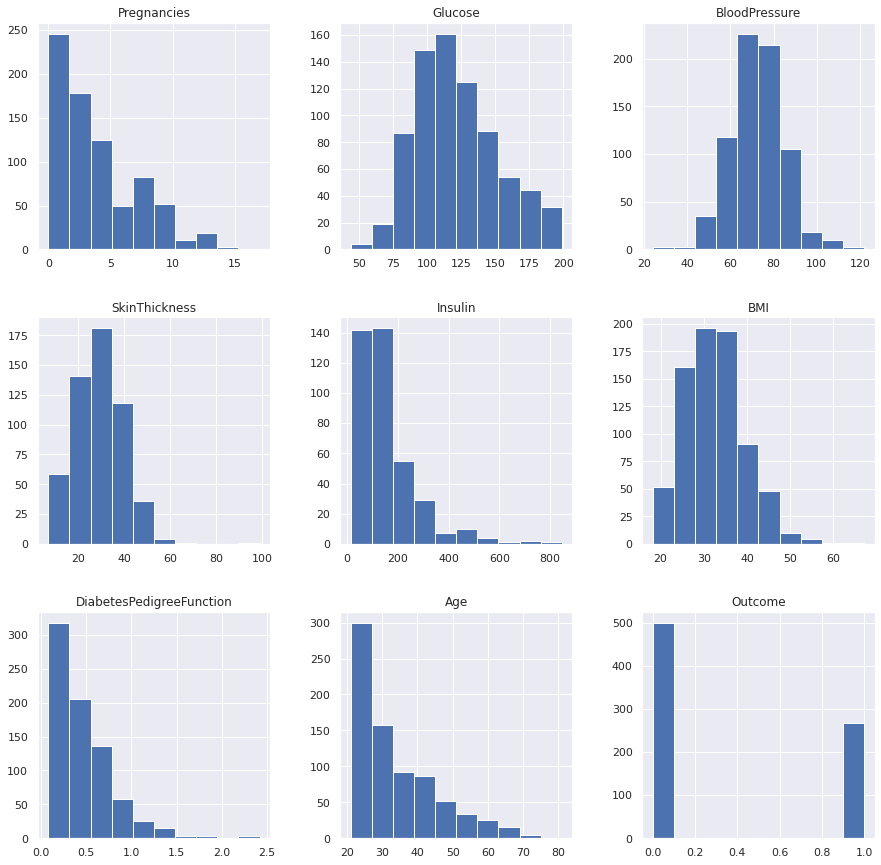

In [11]:
p = pima.hist(figsize=(15,15))

열의 분포에 따라 nan값을 대치하는 것을 목표로 한다.

In [12]:
pima['Glucose'].fillna(pima['Glucose'].mean(), inplace=True)
pima['BloodPressure'].fillna(pima['BloodPressure'].mean(), inplace=True)
pima['SkinThickness'].fillna(pima['SkinThickness'].mean(), inplace=True)
pima['Insulin'].fillna(pima['Insulin'].mean(), inplace=True)
pima['BMI'].fillna(pima['BMI'].mean(), inplace=True)

## 4.2 결측치 제거 후 플롯팅
Plottinf after NaN removal

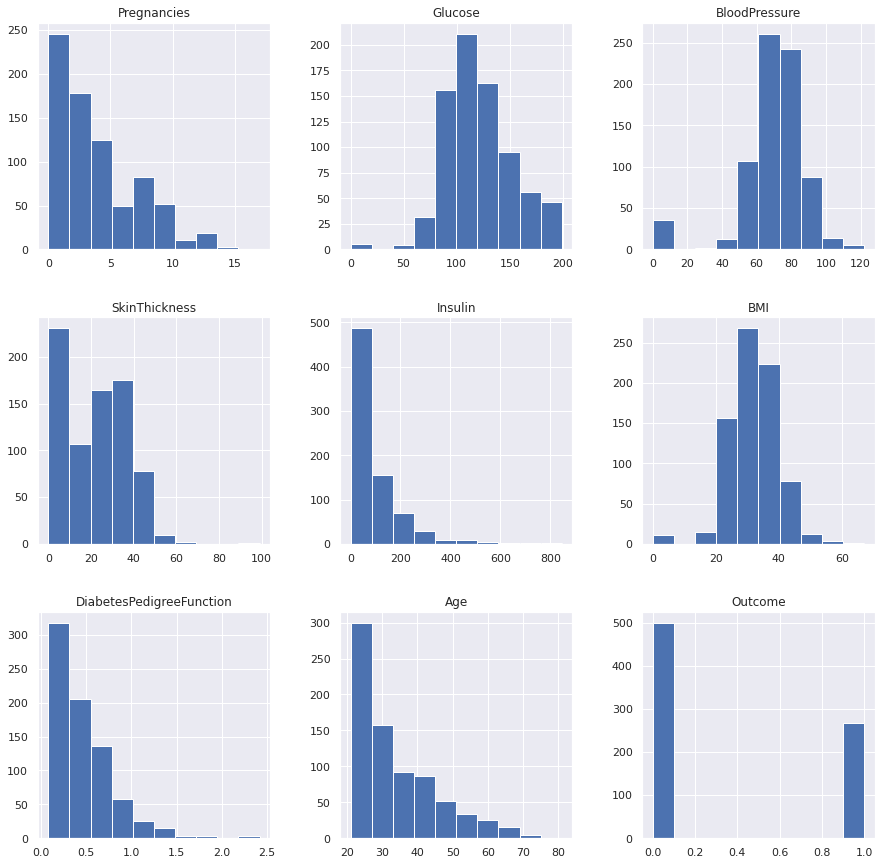

In [14]:
p = diabetes.hist(figsize=(15,15))

## 4.3 Skewness(왜도)
* 음의 왜도 : 왼쪽으로 치우친 분포이며 왼쪽으로 꼬리가 길다. 평균값 또한 정점의 왼쪽에 위치한다.
* 양의 왜도 : 오른쪽으로 치우친 분포이며 오른쪽으로 꼬리가 길다. 평균값 또한 정점의 오른쪽에 위치한다. 

> [왜도에 대해 더 알아보기](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/)

In [15]:
# 데이터 모양 관찰
diabetes.shape

(768, 9)

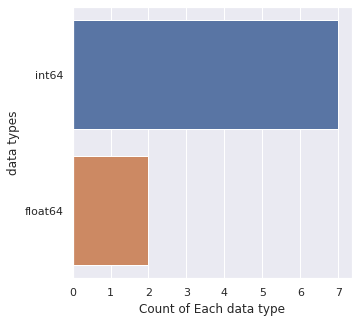

In [17]:
# 데이터 타입 분석
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.countplot(y=diabetes.dtypes.map(str), data=pima) # column별 타입 count위해 열 타입을 문자형으로 변경
plt.xlabel('Count of Each data type')
plt.ylabel('data types')
plt.show()

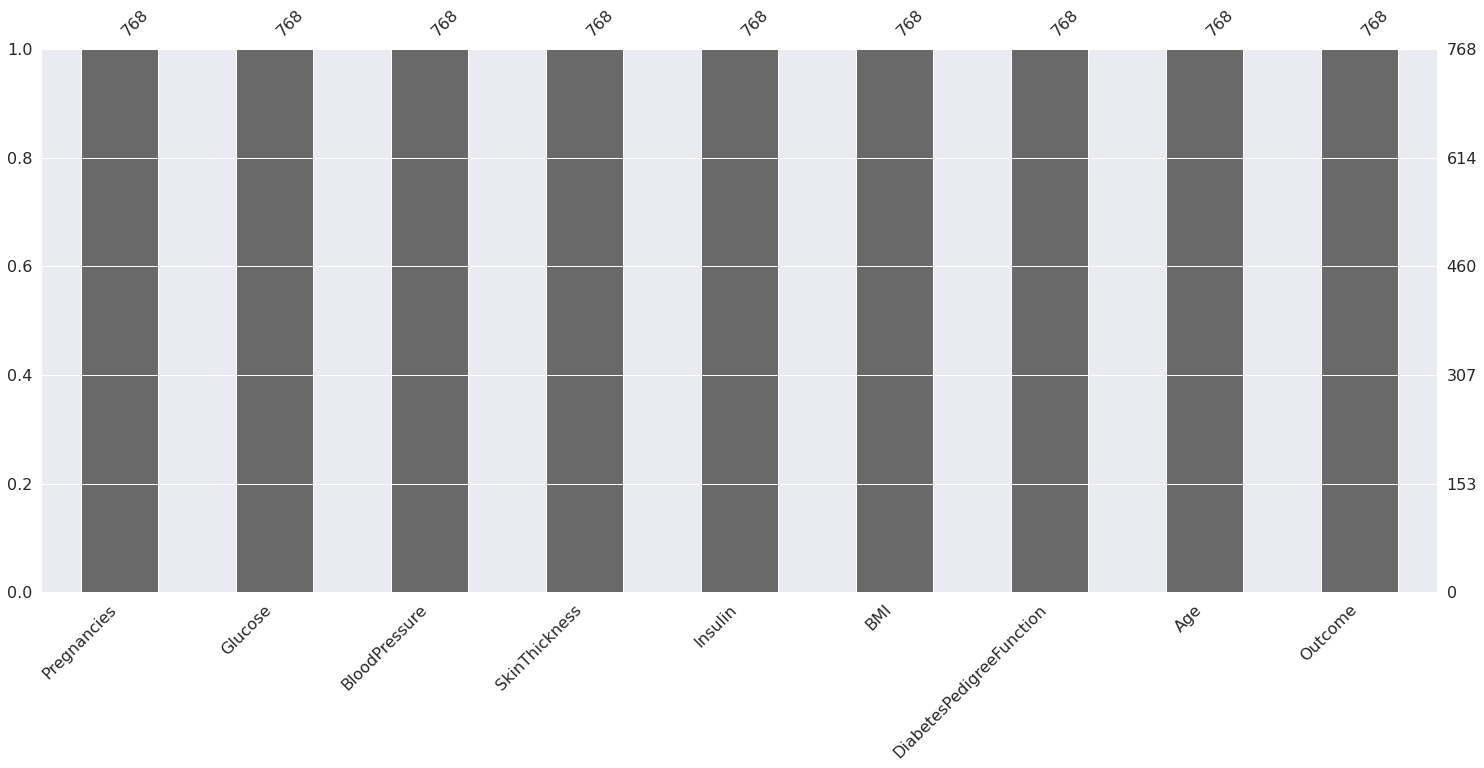

In [18]:
# Null count analysis
p = msno.bar(diabetes)

0    500
1    268
Name: Outcome, dtype: int64


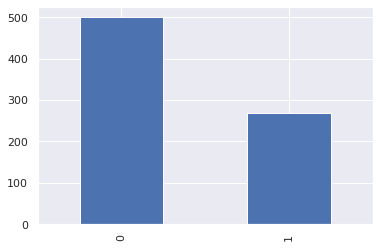

In [24]:
# outcome 갯수를 값으로 플롯팅해 데이터의 균형 확인 
color_wheel = {0:'#0392cf',1:'#7bc043'}

colors = diabetes['Outcome'].map(lambda x: color_wheel.get(x+1))
print(diabetes.Outcome.value_counts())
p = diabetes.Outcome.value_counts().plot(kind='bar')

위 그래프는 데이터 결과값이 0인 데이터 포인트쪽으로 편향되어 있음을 보여주며 이는 당뇨병에 걸리지 않음을 의미한다.  
(당뇨가 아닌 환자는 당뇨환자의 거의 두 배이다.)

## 4.4 산점행렬도

### 4.4.1 정리되지 않은 데이터의 산점행렬도(diabetes)

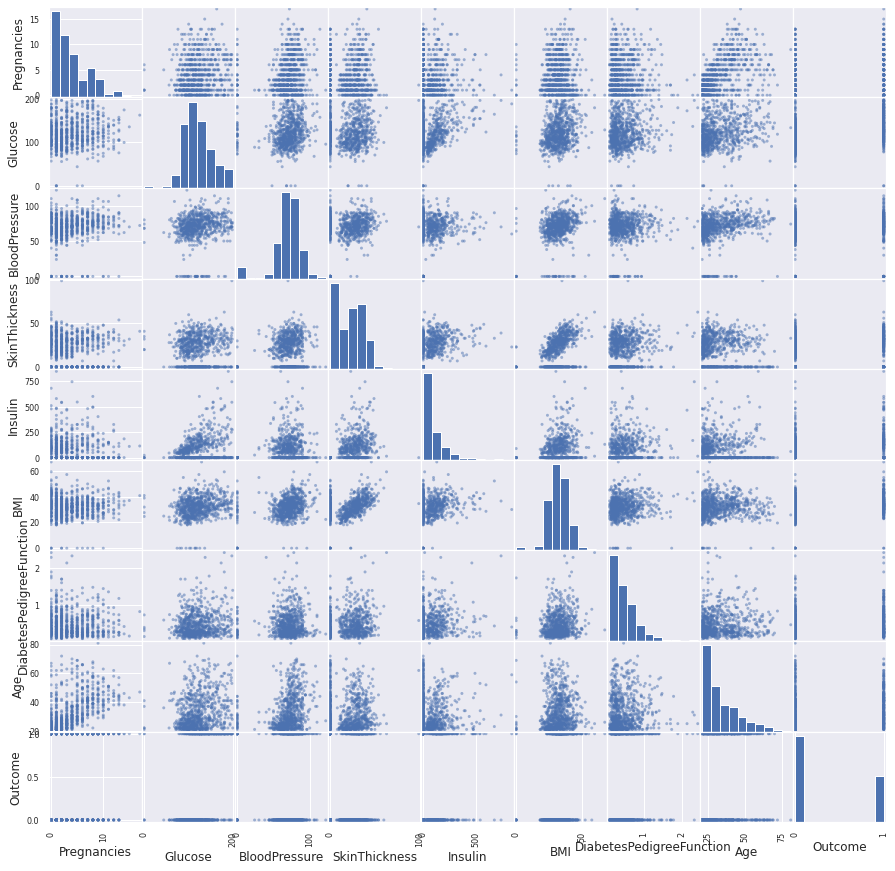

In [25]:
p = scatter_matrix(diabetes, figsize=(15,15))

pair plot은 <u>히스토그램</u>과 <u>산점도</u>라는 두가지 그림을 기반으로 한다. 대각선의 히스토그램을 통해 단일 변수의 분포를 확인할 수 있고, 위/아래 삼각형의 산점도는 두 변수 사이의 관계(혹은 관계 없음)을 보여준다.  

> [pair plot 참조](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

### 4.4.2 정리된 데이터의 산점행렬도(pima)

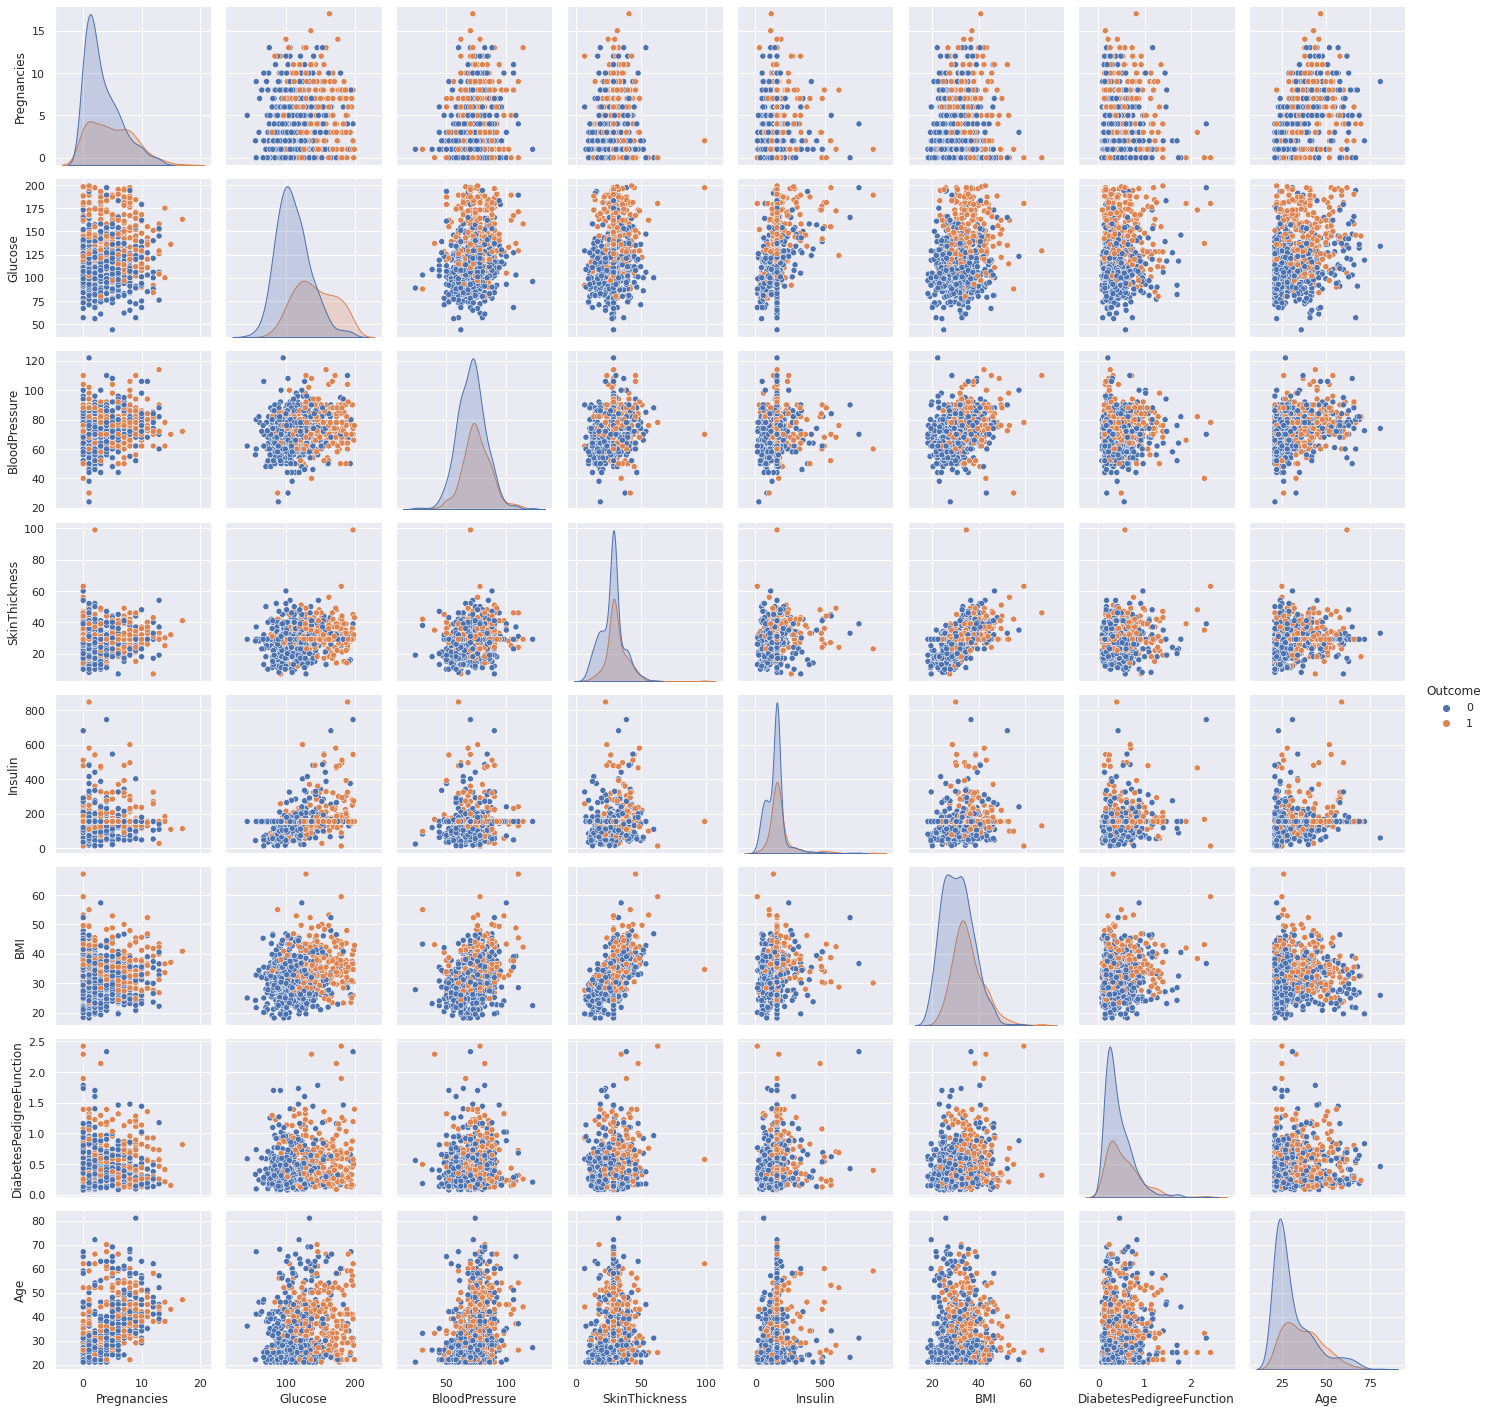

In [26]:
p = sns.pairplot(pima, hue='Outcome')

# 5.피어슨 상관계수(Heatmap)
**피어슨(Pearson) 상관계수
* 두 수량 간의 관계를 찾는데 도움이 된다.
* 두 변수 간의 연관성 강도를 측정한다.
* Pearson의 상관계수 값은 -1 ~ +1 사이일 수 있으며 1은 강한 상관관계, 0은 상관관계가 없음을 의미한다.

히트맵은 색상을 사용해 정보를 2차원으로 표현한 것으로 사용자가 단순하거나 복잡한 정보를 시각화하는데 도움이 될 수 있다.

## 5.1 Heatmap for unclean data

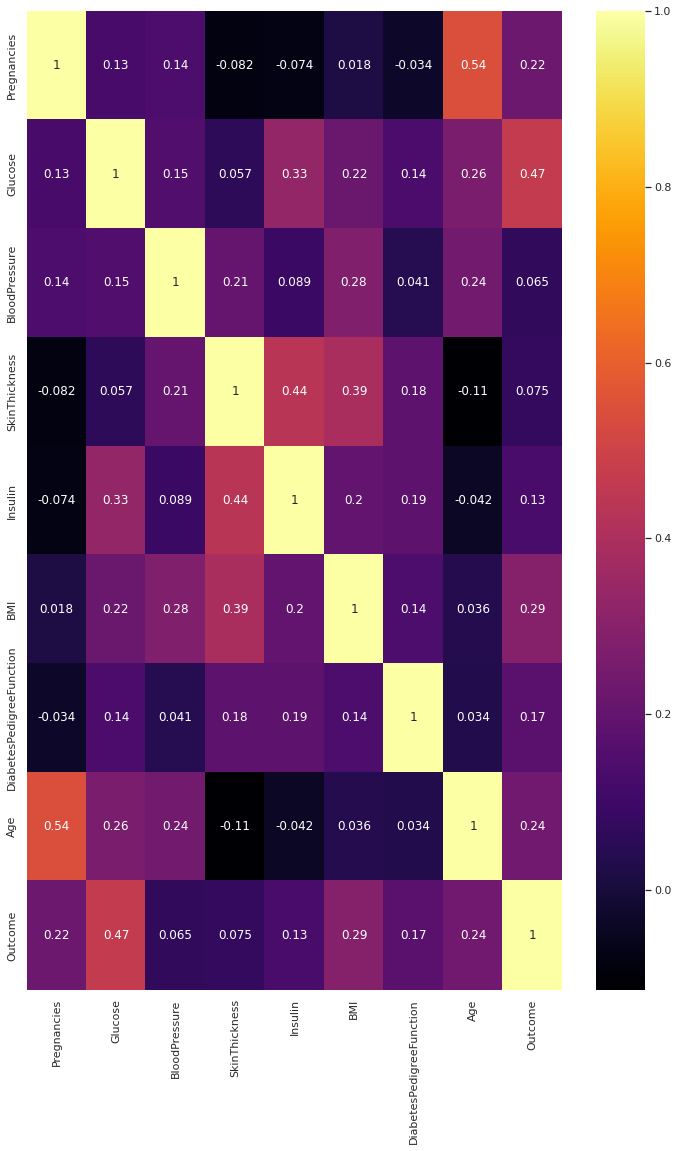

In [27]:
plt.figure(figsize=(12,18))
p = sns.heatmap(diabetes.corr(), annot=True, cmap='inferno')

## 5.2 Heatmap for clean data

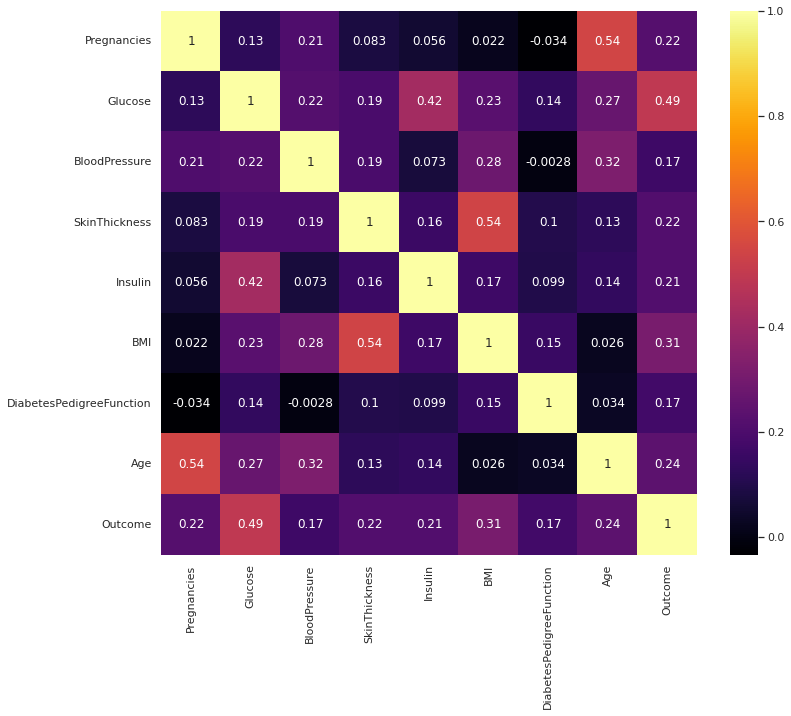

In [28]:
plt.figure(figsize=(12,10))
p = sns.heatmap(pima.corr(), annot=True, cmap='inferno')

## 5.3 데이터 정규화
데이터 Z는 μ(평균) = 0, σ(표준편차) = 1이 되도록 스케일 조정하며, 다음 공식을 통해 계산한다.
* μ : 평균
* σ : 표준편차
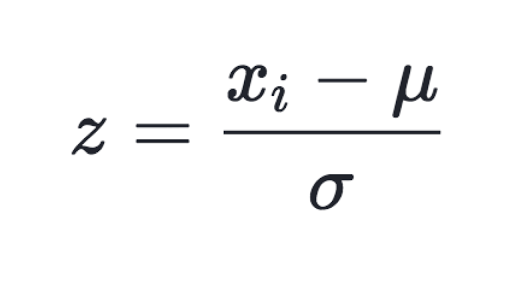

> [스케일링에 대해 더 알아보기](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/)

In [30]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(pima.drop(['Outcome'],axis=1)), columns=pima.columns[:-1])
y = pima.Outcome

In [31]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


## 5.4 KNN을 위해 스케일링하는 이유?
**KNN과 같은 <U>거리 기반 알고리즘</U>을 적용하기 위해서는 모든 변수를 동일한 척도로 가져오는 것이 바람직하다.

크기/범주가 크게 다른 두가지 모형을 사용한 거리 계산의 예를 살펴보자.
$$ Euclidean Distance = [(100000-80000)^2 + (30-25)^2]^\frac{1}{2})$$

<br>
범위가 크거나 작은 변수들을 완전히 무색하거나 희미하게 만드는 특징을 상상할 수 있으며, 이는 크기가 더 큰 변수에 더 높은 가중치를 부여하기 때문에 모든 거리 기반 모델 성능에 영향을 미칠 것이다.

# 6.Train Test Split and Cross Validation Methods
> [train/test split and Cross Validation 참고](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

## 6.1 Train Test Split
* *Train Test Split* : 모형이 훈련된 동일한 포인트로 테스트하는 대신 데이터를 테스트하기 위해 알 수 없는 데이터 포인트를 사용한다. 따라서 모델 성능을 훨씬 더 잘 포착할 수 있다.

## 6.2 Cross Validation
* *Cross Validation* : 모델을 훈련과 테스트로 나눌 때 특정 유형의 데이터 포인트가 완전히 훈련 또는 테스트 부분으로 들어갈 수 있다. 

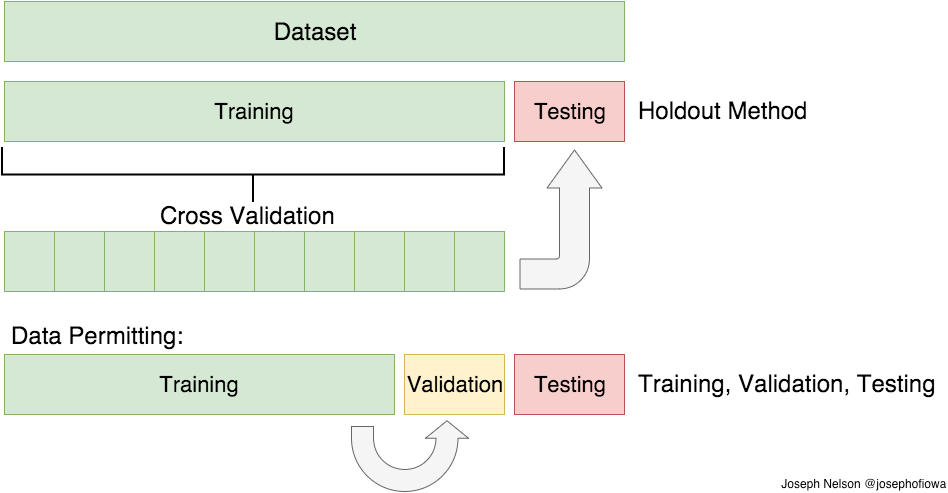

## 6.3 Stratify(계층)
 * *About Stratify :* 계층화 매개변수는 생성된 샘플의 값 비율이 매개 변수 계층화에 제공된 값의 비율과 동일하도록 분할한다.  
 (예시) 0:25%, 1:75%의 이진 변수 y가 있는 경우 stratify=y는 임의의 분할에 해당 분포(0은 25%, 1은 75%)를 갖는지 확인한다.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [53]:
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [54]:
# 훈련세트에서 얻은 점수
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v == max_train_score]
print(f"Max train socre = {max_train_score*100}% and k={list(map(lambda x : x+1, train_scores_ind))}")

Max train socre = 100.0% and k=[1]


In [55]:
# 테스트세트에서 얻은 점수
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print(f"Max test score = {max_test_score*100}% and k = {list(map(lambda x : x+1, test_scores_ind))}")

Max test score = 77.27272727272727% and k = [8]


## 6.4 Result Visualization

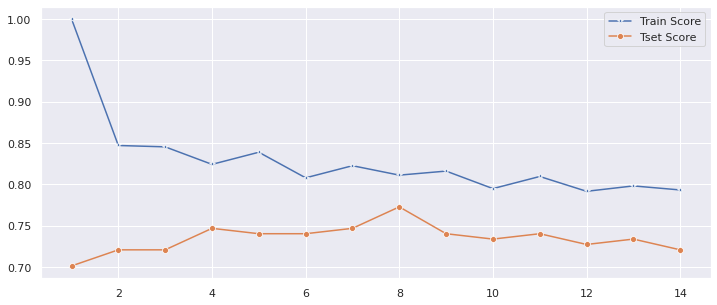

In [56]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Tset Score')

최적의 결과는 k=8이며 최종 모델에 '8'을 사용한다.

In [57]:
# k개의 이웃으로 KNN분류기를 설정한다.
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7727272727272727

## 7.6 의사 결정 경계 플롯 시도
trying to plot decision boundary

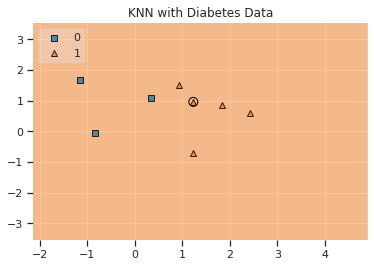

In [65]:
value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2:value, 3:value, 4:value, 5:value, 6:value, 7:value},
                      filler_feature_ranges={2:width, 3:width, 4:width, 5:width, 6:width, 7:width},
                      X_highlight = X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

# 7.모델 성능 분석
Model Performance Analysis

## 7.1 Confusion Matrix
혼동 행렬은 분류 알고리즘의 성능을 요약하는데 사용되는 기술이다.  
(즉, 이진 출력이 있다.)


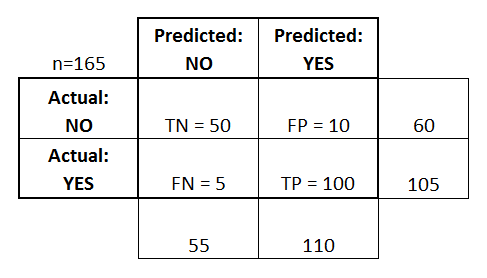
    

**유명한 암 사례에서 :**
* TP (True Positive) : 의사가 '있다'(질병이 있음)라고 예측하고 질병이 있는 경우를 **참 양성(TP)**이라 한다.  
 (의사가 환자에게 질병이 있다고 정확하게 예측)

* TN (True Negative) : 의사가 '없다'(질병이 없음)라고 예측하고 질병이 업는 경우를 **참 부정(TN)**이라 한다.  
 (의사가 환자에게 질병이 없다고 정확하게 예측)

* 1종 오류 : 의사가 **'있다'**라고 예측했지만 질병이 **'없는'** 경우를 False Positive(FP)라고 한다.

* 2종 오류 : 의사가 **'없다'**라고 예측했지만 질병이 **'있는'** 경우를 False Negative(FN)라고 한다.

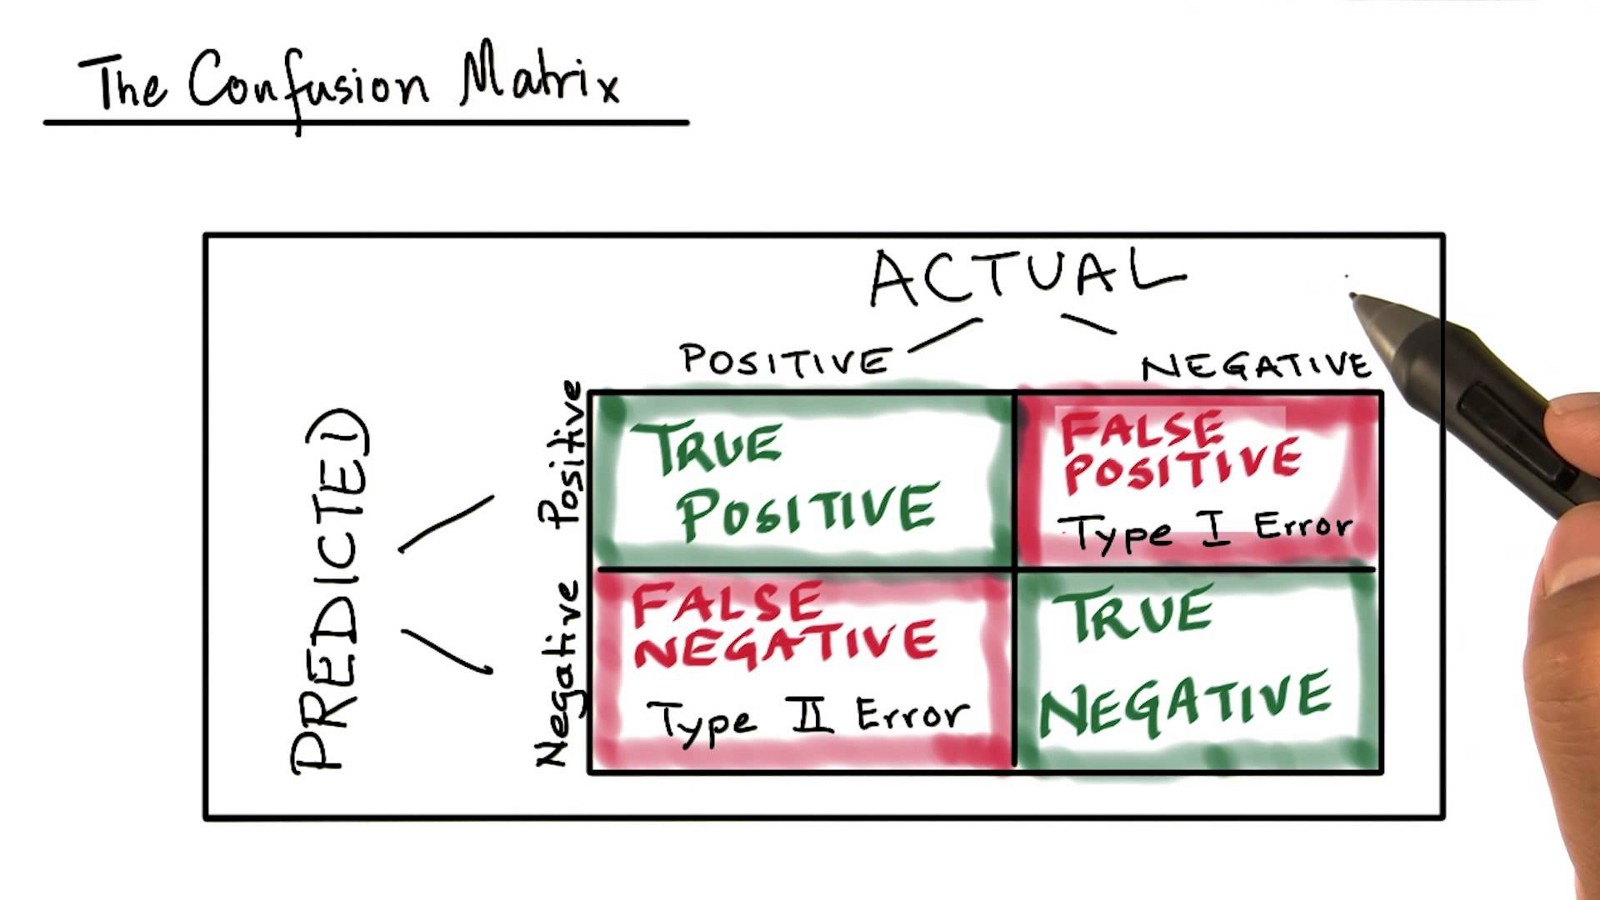

In [73]:
# 위의 적합했던 분류기를 사용해 예측을 얻는다.
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,88,12,100
1,23,31,54
All,111,43,154


Text(0.5, 12.5, 'Predicted label')

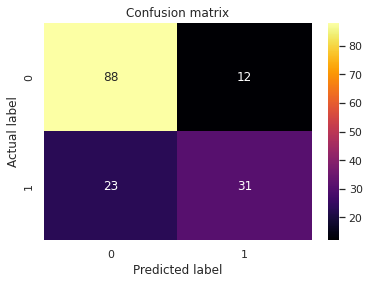

In [76]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='inferno', fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 7.2 Classification Report
리포트는 Precision(정밀도), Recall(재현율), F1-Score(정확도)를 포함한다.  

* Precision Score(정밀도)
$$(Precision) = \frac{TP}{TP + FP}$$
        정밀도는 모델이 True로 분류한 것 중에서 실제 True 인 것의 비율이다. 
        (예 - 날씨 예측 모델이 맑다고 예측하고 실제 날씨가 맑음.)

        TP - True Positives
        FP - False Positives

        Precision - 긍정 예측의 정확성
        

* Recall Score(재현율)
$$(Recall) = \frac{TP}{TP+FN}$$
        재현율은 실제 True인 것 중에서 모델이 True로 예측한 것의 비율이다. 
        (예 - 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표)


* F1 Score(정확도)
$$(F1\ Score) = 2 * \frac{Precision * Recall}{Precision + Recall}$$
        정밀도(Precision)와 재현율(Recall)을 동등하게 계산한 경우이다.(정밀도와 재현율의 조화평균)
        1. 정밀도와 재현율이 모두 중요한 경우
        2. 둘을 따로 볼 경우 Trade-off 관계가 발생해 판단 어렵다.
        => 이 경우 둘을 조화평균한 F1-score 사용한다. 
    

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



## 7.3 ROC - AUC
ROC(Receiver Operating Characteristic)는 Curve 모델이 두 가지를 얼마나 잘 구별할 수 있는지 알려준다.  
(ex - 환자에게 질병이 있는지 여부)  
더 나은 모델은 둘을 정확하게 구별할 수 있으며 반면 열악한 모델은 두가지를 구별하는데 어려움을 겪을 수 있다.

> [ROC-AUC 설명 영상](https://www.youtube.com/watch?v=OAl6eAyP-yo)

In [80]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

0.8023148148148149 	


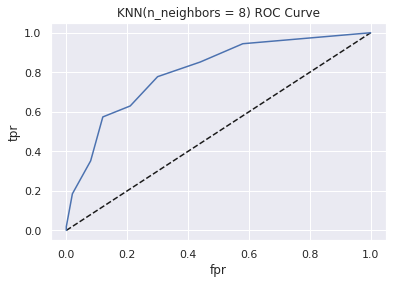

In [84]:
print(roc_auc_score(y_test, y_pred_proba),'\t')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN(n_neighbors = 8) ROC Curve')
plt.show()

## 7.4 Hyper Parameter optimization
 * GridSearch는 그리드에 지정된 알고리즘 매개 변수의 각 조합에 대해 모델을 체계적으로 구축하고 평가하는 하이퍼파라미터튜닝에 대한 접근법이다.

 * 다음 예를 살펴보자 :
  1. 머신러닝 모델X가 하이퍼파라미터 a1,a2,a3를 취한다고 가정한다.
  2. Grid Search에서는 먼저 하이퍼파라미터 a1,a2,a3에 대한 값 범위를 정한다.   
  3. 첫 값부터 마지막 값까지 모든 조합을 진행한다.
  이러한 Hyper Parameter 값의 범위를 그리드라 한다.

  * 주의, 하이퍼파라미터에 대해 정의하는 값의 배열은 하이퍼파라미터가 정수만 사용하는 경우, 배열에 소수값을 사용할 수 없다.


  

In [88]:
param_grid = {'n_neighbors' : np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X, y)

print(f"Best Score : {str(knn_cv.best_score_)}")
print(f"Best Parameters : {str(knn_cv.best_params_)}")

Best Score : 0.7812713602187287
Best Parameters : {'n_neighbors': 27}
